In [2]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
dead = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
recovered = pd.read_csv(url, error_bad_lines=False)

In [3]:
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,53,59,70,75,82,114,147,177
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,502,511,581,639,639,701,773,839,825,878
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,150,160,178,178,200,212,226,243,266
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,99,117,129,149,149,197,238,428,566,673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
456,Reunion,France,-21.1351,55.2471,0,0,0,0,0,0,...,0,0,0,1,1,5,6,7,9,9
457,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
458,NaN,Montenegro,42.5000,19.3000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [5]:
#Creating new pandas DataFrames to analyze the global situation
confirmed_global = pd.DataFrame(confirmed.drop(['Province/State', 'Country/Region','Lat', 'Long'], axis=1).sum()).rename(columns={0: 'confirmed'})
dead_global = pd.DataFrame(dead.drop(['Province/State','Country/Region', 'Lat', 'Long'], axis=1).sum()).rename(columns={0: 'dead'})
recovered_global = pd.DataFrame(recovered.drop(['Province/State', 'Country/Region','Lat', 'Long'], axis=1).sum()).rename(columns={0: 'recovered'})


global_information = pd.concat([confirmed_global, dead_global, recovered_global], axis=1)

#Adding a time column that will be accessed later to build the line plot
global_information.reset_index(inplace=True)

In [6]:
global_information['numbered'] = global_information.index
global_information

,index,confirmed,dead,recovered,numbered
0,1/22/20,555,17,28,0
1,1/23/20,653,18,30,1
2,1/24/20,941,26,36,2
3,1/25/20,1434,42,39,3
4,1/26/20,2118,56,52,4
5,1/27/20,2927,82,61,5
6,1/28/20,5578,131,107,6
7,1/29/20,6166,133,126,7
8,1/30/20,8234,171,143,8
9,1/31/20,9927,213,222,9


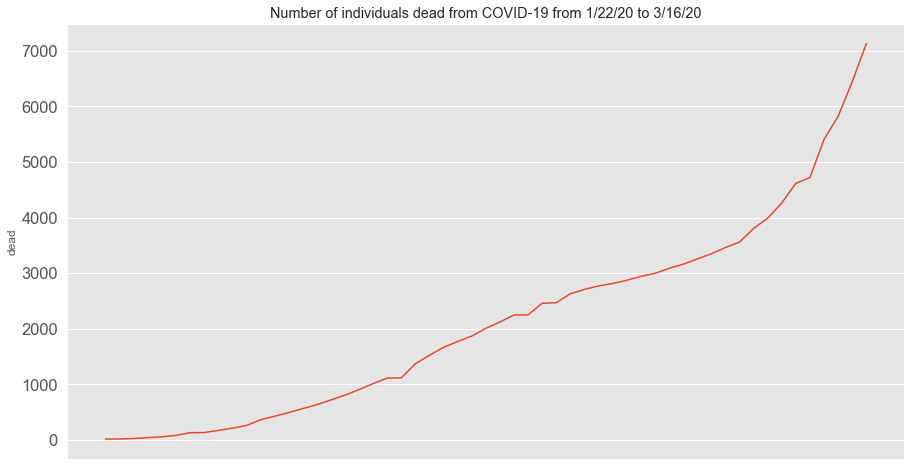

In [11]:
import matplotlib.pyplot as plt
import matplotlib.style as style
sns.set(font_scale=1.5)
style.use('ggplot')
plt.figure(figsize=(15,8))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
# sns.set_context('poster',font_scale=4)
plt.title('Number of individuals dead from COVID-19 from 1/22/20 to 3/16/20')
sns.lineplot(x = global_information.index, y=global_information['dead'])

plt.savefig('global_dead.png', dpi=600)

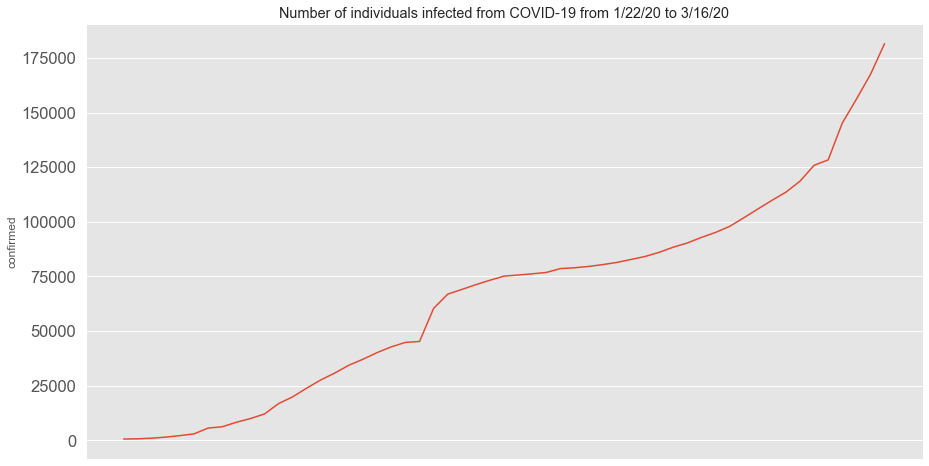

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
# sns.set_context('poster',font_scale=4)
plt.title('Number of individuals infected from COVID-19 from 1/22/20 to 3/16/20')
sns.lineplot(x = global_information.index, y=global_information['confirmed'])

plt.savefig('global_infected.png', dpi=600)

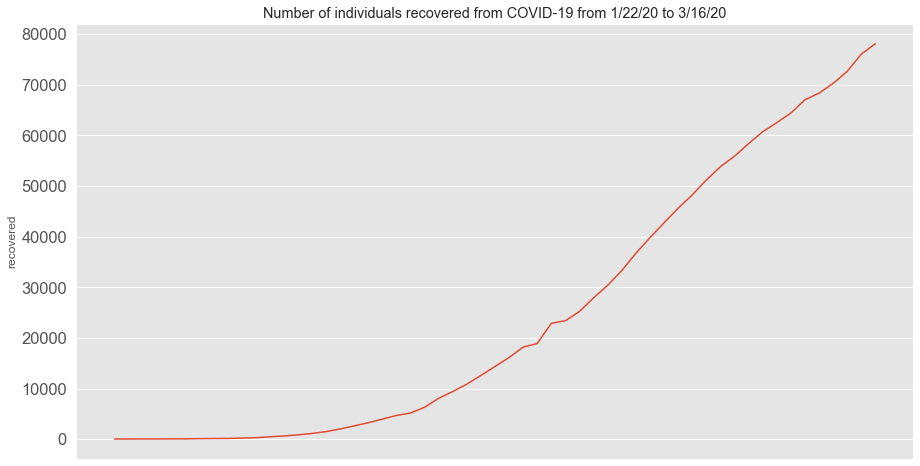

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
# sns.set_context('poster',font_scale=4)
plt.title('Number of individuals recovered from COVID-19 from 1/22/20 to 3/16/20')
sns.lineplot(x = global_information.index, y=global_information['recovered'])

plt.savefig('global_recovered.png', dpi=600)

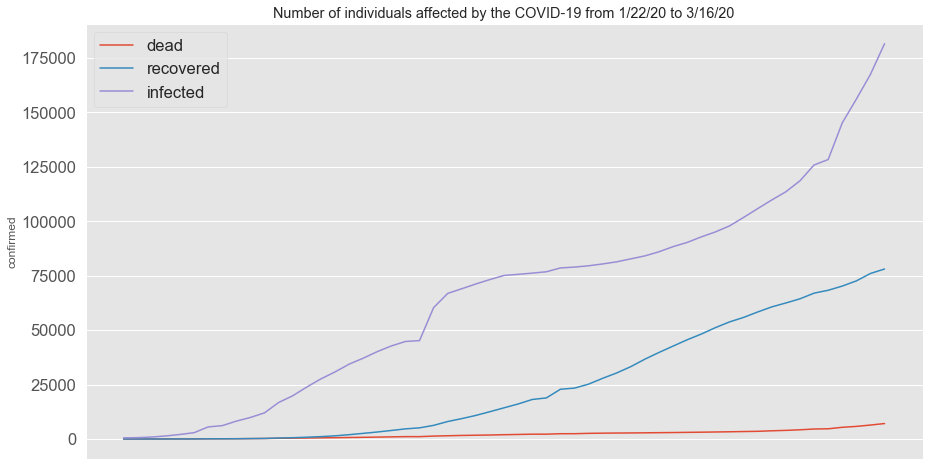

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.title('Number of individuals affected by the COVID-19 from 1/22/20 to 3/16/20')
sns.lineplot(x = global_information.index, y=global_information['dead'], label='dead')
sns.lineplot(x = global_information.index, y=global_information['recovered'], label='recovered')
sns.lineplot(x = global_information.index, y=global_information['confirmed'], label='infected')


plt.savefig('global_stats.png', dpi=600)



Text(0.5, 1, 'Number of individuals recovered from COVID-19 from 1/22/20 to 3/16/20')

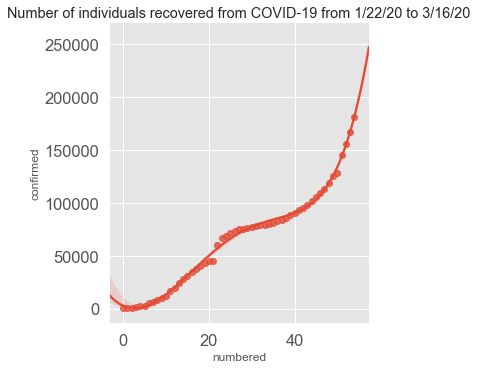

In [91]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(15,8))
# cur_axes = plt.gca()
# cur_axes.axes.get_xaxis().set_visible(False)
# sns.set_context('poster',font_scale=4)
sns.lmplot(x = 'numbered', y='confirmed', data=global_information, order=5)
plt.title('Number of individuals recovered from COVID-19 from 1/22/20 to 3/16/20')


Text(0.5, 1, 'Number of individuals recovered from COVID-19 from 1/22/20 to 3/16/20')

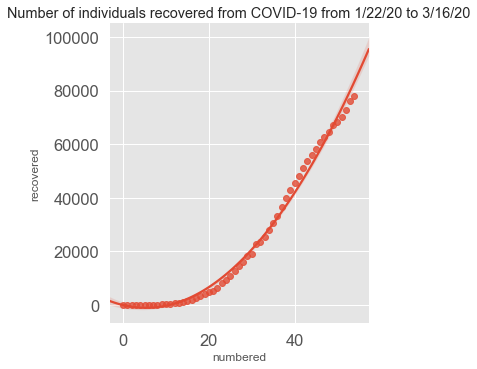

In [92]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(15,8))
# cur_axes = plt.gca()
# cur_axes.axes.get_xaxis().set_visible(False)
# sns.set_context('poster',font_scale=4)
sns.lmplot(x = 'numbered', y='recovered', data=global_information, order=2)
plt.title('Number of individuals recovered from COVID-19 from 1/22/20 to 3/16/20')


In [15]:
global_information

,index,confirmed,dead,recovered,numbered
0,1/22/20,555,17,28,0
1,1/23/20,653,18,30,1
2,1/24/20,941,26,36,2
3,1/25/20,1434,42,39,3
4,1/26/20,2118,56,52,4
5,1/27/20,2927,82,61,5
6,1/28/20,5578,131,107,6
7,1/29/20,6166,133,126,7
8,1/30/20,8234,171,143,8
9,1/31/20,9927,213,222,9


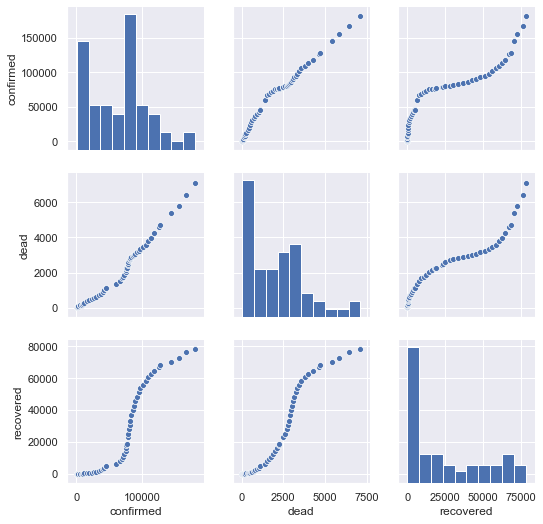

In [101]:
sns.set()
sns.pairplot(global_information.drop('numbered', axis=1))

In [26]:
confirmed['3/16/20']

0      147
1      825
2      243
3        1
4      566
      ... 
458      1
459      1
460      1
461      1
462      1
Name: 3/16/20, Length: 463, dtype: int64

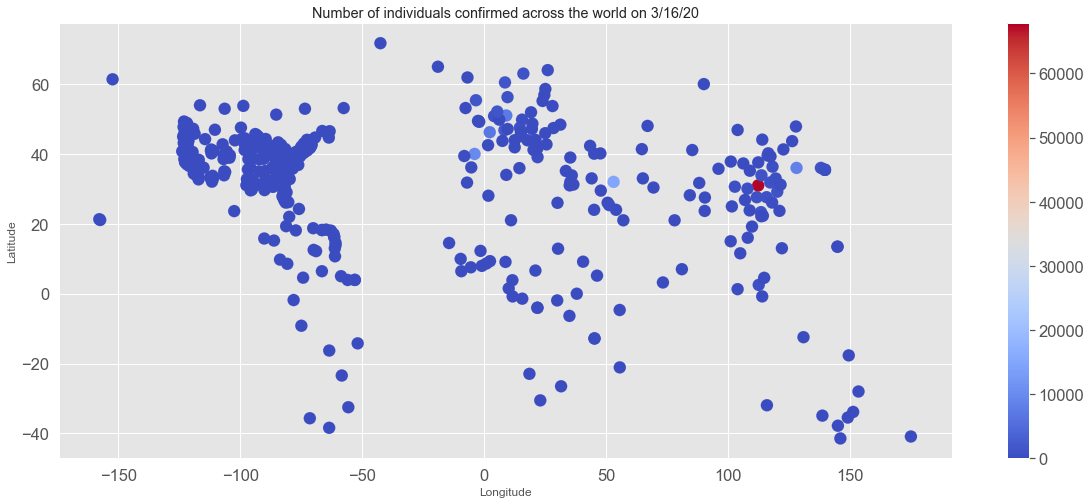

In [60]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.scatter(confirmed['Long'], confirmed['Lat'], s=150, linewidths=0.1, c=confirmed['3/16/20'], cmap=plt.cm.coolwarm)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Number of individuals confirmed across the world on 3/16/20')

plt.colorbar()
plt.savefig('max_confirmed.png', dpi=600)

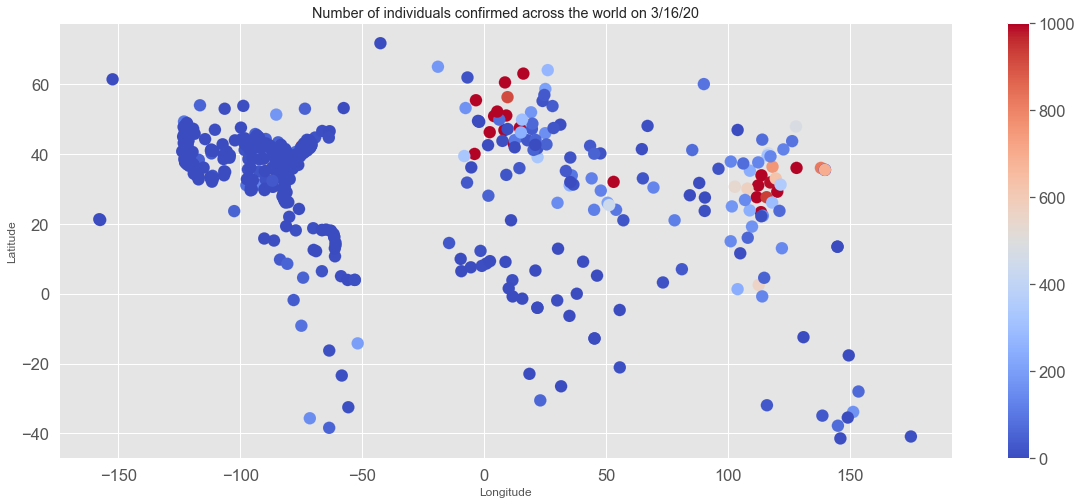

In [61]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.scatter(confirmed['Long'], confirmed['Lat'], s=150, linewidths=0.1, c=confirmed['3/16/20'], cmap=plt.cm.coolwarm, vmax=1000)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Number of individuals confirmed across the world on 3/16/20')

plt.colorbar()
plt.savefig('1000_confirmed.png', dpi=600)

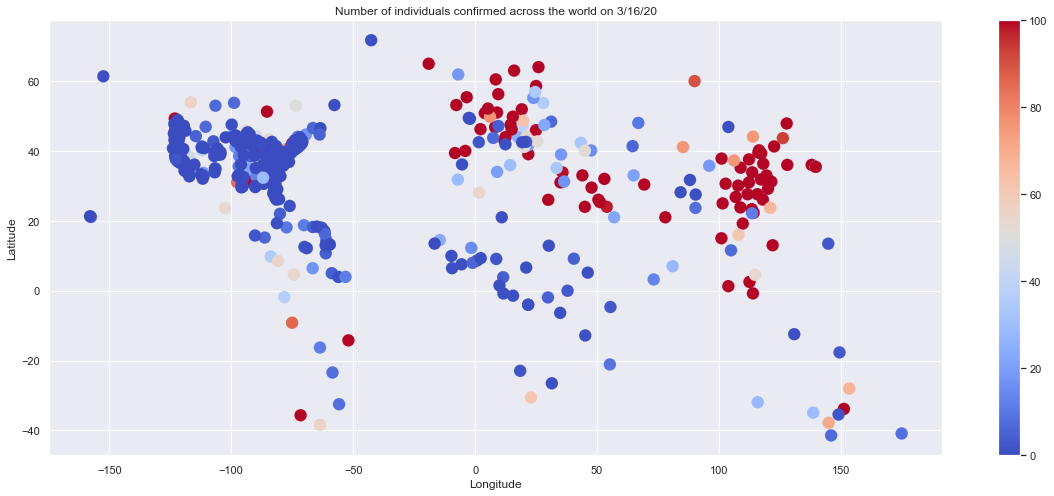

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.scatter(confirmed['Long'], confirmed['Lat'], s=150, linewidths=0.1, c=confirmed['3/16/20'], cmap=plt.cm.coolwarm, vmax=100)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Number of individuals confirmed across the world on 3/16/20')

plt.colorbar()
plt.savefig('100_confirmed.png', dpi=600)

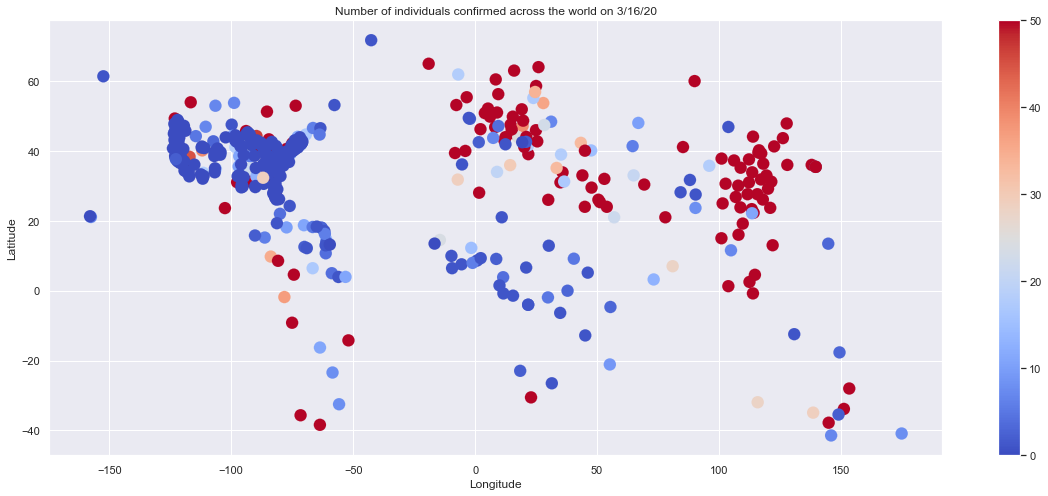

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.scatter(confirmed['Long'], confirmed['Lat'], s=150, linewidths=0.1, c=confirmed['3/16/20'], cmap=plt.cm.coolwarm, vmax=50)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Number of individuals confirmed across the world on 3/16/20')

plt.colorbar()
plt.savefig('50_confirmed.png', dpi=600)

In [31]:
y

array([-1.02813368, -0.41196116,  0.498513  , ..., -1.86937107,
       -1.3779604 , -1.07237355])

In [65]:
plt.figure(figsize=(15,8))


0      147
1      825
2      243
3        1
4      566
      ... 
458      1
459      1
460      1
461      1
462      1
Name: 3/16/20, Length: 463, dtype: int64

In [109]:
confirmed.tail(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
461,Virgin Islands,US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
462,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


In [118]:
type(confirmed['Province/State'])


pandas.core.series.Series

In [ ]:

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)